In [27]:
from sklearn.metrics import mean_squared_error as mse

In [46]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import concurrent.futures
import scipy.interpolate


def load_system_matrix(filename):
    data = scipy.io.loadmat(filename)
    K = data['K']
    key_points = data['key_points']
    return K, key_points

# def process_K(system_matrix):
#     system_matrix = np.array(system_matrix)
#     two_d_array = np.empty((0, system_matrix[0][0].shape[1]))
#     def process_row(row):
#         return row[0]
#     with concurrent.futures.ProcessPoolExecutor() as executor:
#         results = list(executor.map(process_row, system_matrix))
#     for result in results:
#         two_d_array = np.vstack([two_d_array, result])
#     return two_d_array

def process_K(system_matrix):
    system_matrix = np.array(system_matrix)
    two_d_array = np.empty((0, system_matrix[0][0].shape[1]))
    for row in system_matrix:
        two_d_array = np.vstack([two_d_array, row[0]])
    return two_d_array



# system_matrix_full = load_system_matrix('system_matrix_every_interval.mat')
# system_matrix_full = process_K(system_matrix_full)
system_matrix, key_points = load_system_matrix('system_matrix.mat')
# system_matrix = process_K(system_matrix)

In [29]:
# system_matrix_for_interpolate = [i for i in system_matrix]

In [56]:
system_matrix_for_interpolate = []
for i in system_matrix[0]:
    system_matrix_for_interpolate.append(i)

(1, 667)

In [31]:

system_matrix = np.array(system_matrix)
system_matrix.shape


(1, 667)

In [32]:
grid_shape = (160, 120)
num_xy_steps_pixel = 5

# key_points = [(i, j) for i in range(1, grid_shape[0], num_xy_steps_pixel) for j in range(1, grid_shape[1], num_xy_steps_pixel)]
key_points = np.array(key_points)

In [33]:
print(key_points.shape, system_matrix.shape)

(1, 192) (1, 667)


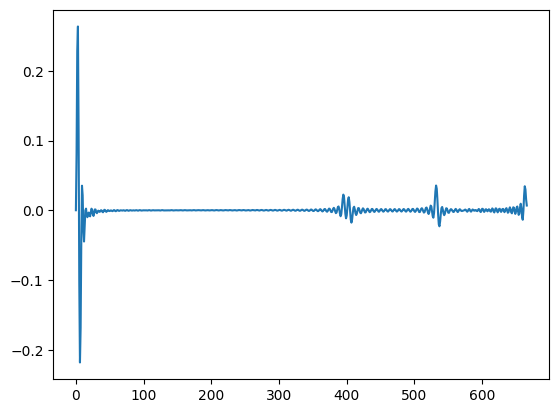

In [34]:
plt.plot(system_matrix[0])

In [35]:
def interpolate_system_matrix(system_matrix, key_points, grid_shape):
    print(system_matrix.shape, key_points.shape)
    full_system_matrix = np.zeros((grid_shape[0] * grid_shape[1], grid_shape[0] * grid_shape[1]))
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            interp_func = scipy.interpolate.LinearNDInterpolator(key_points, system_matrix[:, i, j])
            grid_x, grid_y = np.meshgrid(np.arange(grid_shape[1]), np.arange(grid_shape[0]))
            interpolated_values = interp_func(grid_x, grid_y)
    return full_system_matrix
# interp_func = scipy.interpolate.LinearNDInterpolator(key_points, system_matrix)
full_system_matrix = interpolate_system_matrix(system_matrix, key_points, grid_shape)

(1, 667) (1, 192)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

KeyboardInterrupt: 

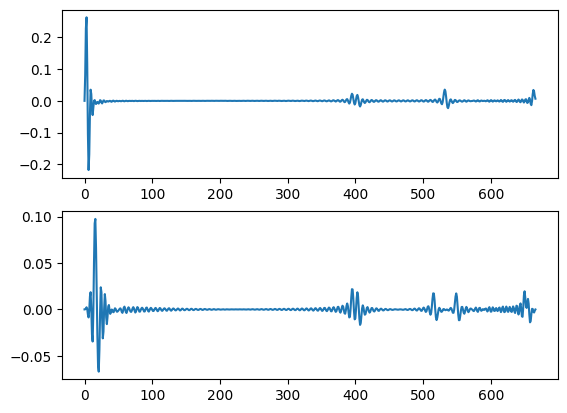

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(system_matrix_full[0])
axs[1].plot(system_matrix_full[5])

In [ ]:
covolved_signal_filtered = scipy.signal.convolve(system_matrix_full[0], system_matrix_full[5], mode='same') / sum*(system_matrix_full[5])
convolved_filtered = scipy.signal.convolve(system_matrix_full[0], system_matrix_full[5], mode='same') / np.sum(system_matrix_full[5])

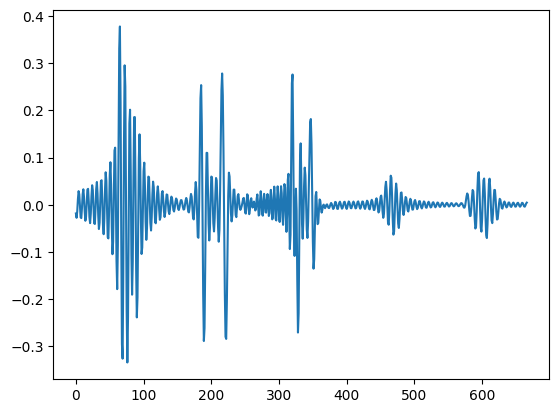

In [ ]:
plt.plot(convolved_filtered)